# The Discrete Fourier Transform

### The definition of the Discrete Fourier Transform
The Discrete Fourier Transform (DFT) is the transformation most commonly used to look at measurements in the frequency domain. By continuing a signal by repeating it periodically, your frequency becomes discrete. The discrete signals within the period causes the DFT to be periodic. In other words, a list of numbers is converted to another list of numbers. We will use the conventional definition, where we transform a list of numbers $x[n]$ with $n=0,1,\dots,N-1$ into $X[k]$ with $k=0,1,\dots,N-1$:

$$
X[k] = \sum_{n=0}^{N-1}x[n] e^{-i 2\pi k\frac{n}{N}}
$$
$$
x[n] = \frac{1}{N}\sum_{k=0}^{N-1} X[k]e^{i2\pi k\frac{n}{N}}
$$

You can convert $X[k]$ into $X[\omega]$ by substituting $k=\frac{\omega T}{2\pi}$, where $T$ is the time associated with $x[N-1]$. This ensures that you maintain a one-to-one relationship with the Fourier Transform (Note: You still need to convert the y-axis properly; in general with our definition, the DFT is $\frac{N}{2\pi}$ times larger than the Fourier Transform of the same signal, if the signal is non-discrete and zero outside the domain. Note that this is only an approximation, and holds only when a large enough sampling frequency is used.)

### Numerical implementation of the Discrete Fourier Transform
This section contains a number of exercises that serve to implement a Discrete Fourier Transform using Pyhton. We will use this to extract the useful signal from a noisy dataset. The datafile (`signal.txt`, available on Brightspace) contains a measured signal in arbitrary units (a.u.) as a function of time (1000 samples/sec, total duration 1s):

![image here](raw_signal.png)

We are interested in two signals that are currently masked by a strong 50 Hz noise signal and white noise (noise with an amplitude that is equally strong at all frequencies). The purpose of the exercise in this section is to build a numerical implementation of the DFT so that we can separate the noise from the signals. This should allow us to determine the frequency, amplitude, and relative phase of the two signals that we are interested in.

The following reference, although somewhat outdated, contains a useful overview of common operations in the programming languages IDL, Python, and Matlab: [https://mathesaurus.sourceforge.net/idl-python-xref.pdf](https://mathesaurus.sourceforge.net/idl-python-xref.pdf)

When working with Python, many functions need to be imported. This can be done using either `import numpy as np` or `from numpy import *`. The first method is often preferred because it often produces more readable code and minimizes errors caused by overwriting of function definitions (see [https://docs.python.org/3/tutorial/modules.html](https://docs.python.org/3/tutorial/modules.html))

The datafile that contains the signal for this exercise is available via Brightspace. Download it, save it and then try to import the data file.

#### Exercise 1.
1. Execute the following Python code to generate a plot of the raw data
2. Ammend the code by adding a list of time values to plot the signal as a function of time to take into account the samplerate of 1000 samples/sec. Makse sure the plot has appropriate labels and units on the axes. 

Text(0, 0.5, 'signal [$a.u.$]')

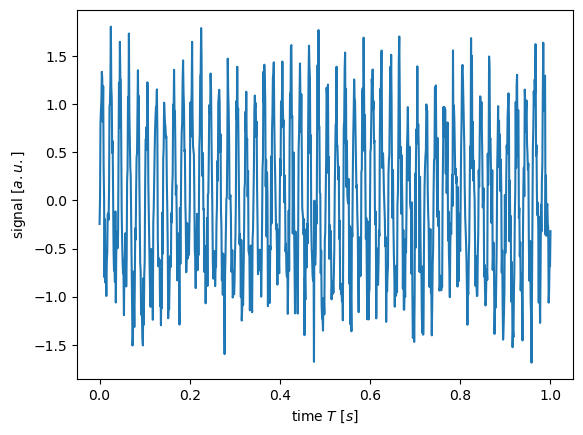

In [2]:
import numpy as np
from matplotlib import pyplot as plt

# Read the data
signal = np.loadtxt("signal.txt")

time = np.linspace(0, 1, 1000)

fig, ax = plt.subplots()
ax.plot(time, signal)
ax.set_xlabel('time $T$ [$s$]')
ax.set_ylabel('signal [$a.u.$]')


Our goal is to numerically implement the DFT and apply this to analyze the noisy data. We need to start with implementing the transform on a known signal so that we can verify that the transform is implemented correctly.

#### Exercise 2.
1. Create a dataset of 1000 points that contains 2 complete periods of a sinusoidal signal with a frequency of 2 Hz. To generate this data make use of the following variables: $N$, $f_\text{sig}$ and $T$ to indicate the number of datapoints, the signal frequency and the total sample time. Determine the samplerate/sample frequency.<br><br>
Use the code from the previous exercise to create a plot of the generated data. Make sure the axes have reasonable labels and include units and verify the correctness of your result.

Text(0, 0.5, 'voltage $V$ [$V$]')

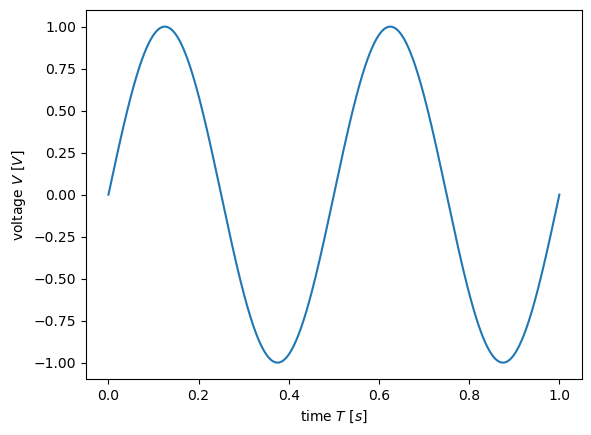

In [3]:
# ↓↓↓ Your code goes here ↓↓↓
N = 1000
fsig = 2
T = 1

time = np.linspace(0, T, N)

signal = np.sin(2 * np.pi * fsig * time)

fig, ax = plt.subplots()
ax.plot(time, signal)
ax.set_xlabel('time $T$ [$s$]')
ax.set_ylabel('voltage $V$ [$V$]')


We will use another notation for the list of numbers and the DFT (we shuffle $n$, $k$, etc.). This is confusing, but in this exercise we will use the notation that is used within the Python help documentation. The discrete Fourier components $C_n$ ($0\leq n<N$) for a dataset $d_m$ ($0 \leq m < N$) are defined as

$$
C_n = \sum_{m=0}^{N-1} d_m \exp\left(-2\pi i \frac{n\cdot m}{N}\right)
$$

2. Implement the numerical computation of the component $C_0$, and use your code to calculate $C_0$ for the sinusoidal test data. This can be implemented using a single line of code or using a for loop. Useful `numpy` functions are `arange`, `sum`, and `exp`. Remember that the complex number $i^2 = -1$ is denoted as `1j` in Python. <br><br>
Your code should return a very small number for $C_0$. Verify this and explain why $C_0$ should be small.

In [4]:
# ↓↓↓ Your code goes here ↓↓↓
C0 = sum([d * np.exp(-2j*np.pi* (0)/(len(signal))) for d in signal])

print(C0)
print("This is very small, as it is basically the sum of all datapoints, whic"+
      "h we expect to be 0, with slight change due to floating point errors")


(-3.4384620716769774e-14+0j)
This is very small, as it is basically the sum of all datapoints, which we expect to be 0, with slight change due to floating point errors


3. Add a constant to your generated signal. If needed create a plot. Compare the amplitude of the Fourier component with frequency zero $C_0$ with the average of the function (you could use the `numpy` function `mean`). Explain the outcome.

In [5]:
# ↓↓↓ Your code goes here ↓↓↓
print("We expect to find the added constant multiplied by the ammount of "+
      "datapoints")

# ↓↓↓ Your code goes here ↓↓↓
C0 = sum([d * np.exp(-2j*np.pi* (0)/(len(signal))) for d in (signal+1)])

print("C0 = " + str(C0))
print("N*mean = " + str(np.mean(signal+1) * len(signal)))
print("See here it works.")


We expect to find the added constant multiplied by the ammount of datapoints
C0 = (1000.0000000000002+0j)
N*mean = 1000.0
See here it works.


4. Determine the frequency that is connected to the Fourier component $C_1$

The frequency of the first component is the frequency that fits completely in the time window of the signal. Since this signal is one second long, the frequency is $f=\frac{1}{T}=\frac{1}{1}=1$ Hz

5. We will now start to implement the Discrete Fourier Transform. Determine the Fourier components for all $n$. You could do so with a loop (e.g. `for n in range(N):`), or through clever use of the inner product (`dot`).<br><br>
You should store the Fourier components in an array `C`, e.g. `C = np.zeros(N, dtype=complex)`.

In [6]:
# ↓↓↓ Your code goes here ↓↓↓
n = np.arange(0, N).reshape(1,1000)
m = n.reshape([1000,1])
matrix = np.dot(m, n)
matrix = np.exp(-2j * np.pi / N * matrix)

C = np.dot(matrix, signal)

6. Create an array $f$ in your code that contains the frequencies $f_0 \cdots f_n$ corresponding to the different Fourier components $C_n$ and plot the absolute value `abs(C)` as a function of the frequency $f$. Make sure you plot a relevant frequency range in order to visualize the relevant part of the DFT

Text(0, 0.5, '|C| [$a.u.$]')

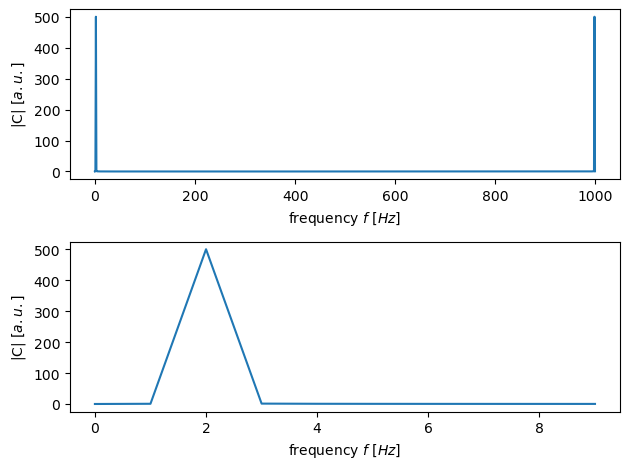

In [7]:
# ↓↓↓ Your code goes here ↓↓↓
f = np.arange(0, N)
f = f/T

fig, ax = plt.subplots(2, layout='tight')

ax[0].plot(f, np.abs(C))
ax[1].plot(f[:10], np.abs(C)[:10])

ax[0].set_xlabel('frequency $f$ [$Hz$]')
ax[1].set_xlabel('frequency $f$ [$Hz$]')
ax[0].set_ylabel('|C| [$a.u.$]')
ax[1].set_ylabel('|C| [$a.u.$]')

Parseval's theorem states that the integral of the modulus squared of a signal is invariant under Fourier Transformations. For this DFT this implies that

$$
\sum_{m=0}^{N-1}|d_m|^2 = \frac{1}{N}\sum_{n=0}^{N-1}|C_n|^2.
$$

7. Use Parseval's theorem to check your DFT.

In [8]:
# ↓↓↓ Your code goes here ↓↓↓
modSquaredSignal = np.sum(np.abs(signal)**2)
modSquaredDFT = 1/N * np.sum(np.abs(C)**2)

print("The sum of the squared values of the signal is: " + 
      str(modSquaredSignal))
print("The sum of the squared values of the DFT is: " + str(modSquaredDFT))


The sum of the squared values of the signal is: 499.50000000000006
The sum of the squared values of the DFT is: 499.50000000000233


8. Adapt the scale of `abs(C)` so that the amplitude corresponds to the original amplitude of the test signal

In [9]:
# ↓↓↓ Your code goes here ↓↓↓
normalised = np.abs(C)

9. Repeat the numerical calculation of the DFT for different values of the signal frequency $f_\text{sig}$. Remove the constant form the function if you did not do so already. Explore at least the following values: $f_\text{sig} = 20$ Hz, $f_\text{sig} = 0.5$ Hz, $f_\text{sig} = 900$ Hz. Can you explain what happens? Hint: see the Nyquist-Shannon sampling theorem ([https://en.wikipedia.org/wiki/Nyquist%E2%80%93Shannon_sampling_theorem](https://en.wikipedia.org/wiki/Nyquist%E2%80%93Shannon_sampling_theorem))

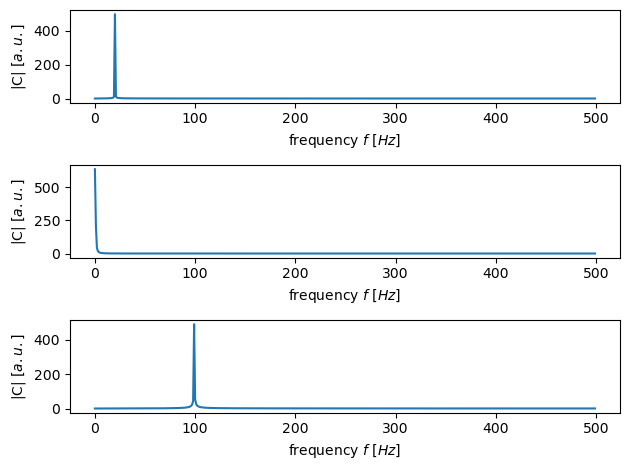

In [10]:
def DFT(signal, N):
    n = np.arange(0, N).reshape(1,1000)
    m = n.reshape([1000,1])
    matrix = np.dot(m, n)
    matrix = np.exp(-2j * np.pi / N * matrix)

    C = np.dot(matrix, signal)
    return C

fig, ax = plt.subplots(3, layout='tight')

for i, fsig in enumerate([20, 0.5, 900]):
    # ↓↓↓ Your code goes here ↓↓↓
    signal = np.sin(2 * np.pi * fsig * time)
    fourier = DFT(signal, N)
    normalised = np.abs(fourier)
    ax[i].plot(f[:500], normalised[:500], label='f = ' + str(fsig) + 'Hz')
    ax[i].set_xlabel('frequency $f$ [$Hz$]')
    ax[i].set_ylabel('|C| [$a.u.$]')


We can see that the fourier analysis of signals outside of the range produces weird results, probably due to alliassing.

10. Use your DFT to analyze the data. Make a plot that shows both the signal and the DFT by plotting `abs(C)`. Make use of exercise 7 and ensure that the axes of your plots have appropriate labels.

The sum of the squared values of the signal is: 624.1664790798216
The sum of the squared values of the DFT is: 624.1664790798236


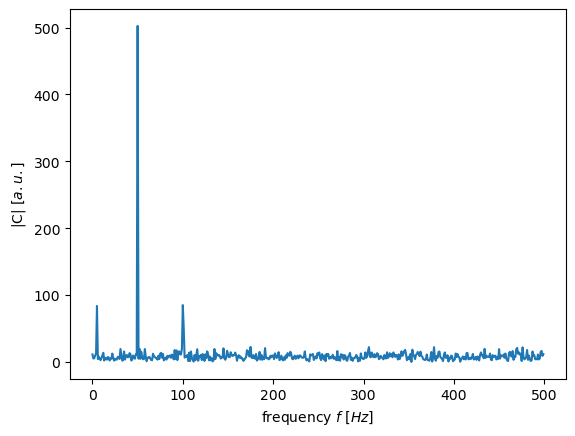

In [11]:
# ↓↓↓ Your code goes here ↓↓↓
signal = np.loadtxt("signal.txt")
N = len(signal)
time = np.linspace(0, 1, N)
fourier = DFT(signal, N)
normalised = np.abs(fourier)
f = np.arange(0, N)
f = f/T

fig, ax = plt.subplots()
ax.plot(f[:N//2], normalised[:N//2])
ax.set_xlabel('frequency $f$ [$Hz$]')
ax.set_ylabel('|C| [$a.u.$]')

modSquaredSignal = np.sum(np.abs(signal)**2)
modSquaredDFT = 1/N * np.sum(normalised**2)

print("The sum of the squared values of the signal is: " + 
      str(modSquaredSignal))
print("The sum of the squared values of the DFT is: " + str(modSquaredDFT))

11. Use the plot to determine the amplitude of the 50 Hz noise signal and the amplitude and frequency of the two 'hidden signals'.

In [12]:
# ↓↓↓ Your code goes here ↓↓↓
from scipy.signal import argrelextrema
amplitude50 = normalised[50]

amplitude5 = normalised[5]

amplitude100 = normalised[100]

print(f'the amplitude at 50Hz is {amplitude50}')
print(f'the amplitude at 5Hz is {amplitude5}')
print(f'the amplitude at 100Hz is {amplitude100}')



the amplitude at 50Hz is 502.41789887646144
the amplitude at 5Hz is 83.75025015051854
the amplitude at 100Hz is 85.04941957605882


12. The DFT is a complex quantity, i.e. $C_n = |C_n| \exp(i\phi)$. Plot the phase $\phi$ (use `np.angle(C)`) as a function of frequency and determine the phase of the 3 signals

the phase of the signal at 50Hz is 4.7304376124561776
the phase of the signal at 5Hz is 6.215246376429571
the phase of the signal at 100Hz is 3.845178777074863


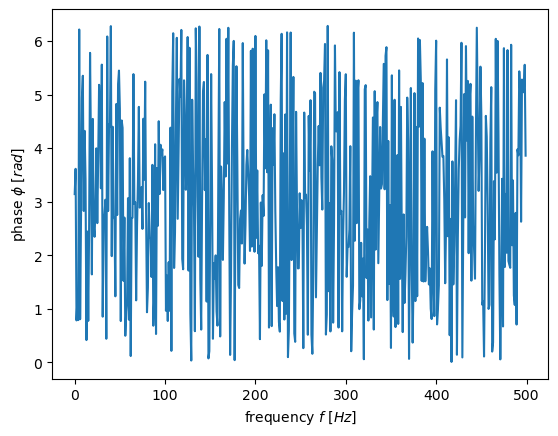

In [13]:
phase = np.mod(np.angle(fourier), 2*np.pi)

fig, ax = plt.subplots()
ax.plot(f[:N//2], phase[:N//2])
ax.set_xlabel('frequency $f$ [$Hz$]')
ax.set_ylabel('phase $\phi$ [$rad$]')

# ↓↓↓ Your code goes here ↓↓↓
phase50 = phase[50]
phase5 = phase[5]
phase100 = phase[100]

print(f'the phase of the signal at 50Hz is {phase50}')
print(f'the phase of the signal at 5Hz is {phase5}')
print(f'the phase of the signal at 100Hz is {phase100}')

13. Use the DFT to remove the 50 Hz noise from the signal.

Text(0, 0.5, '|C| [$a.u.$]')

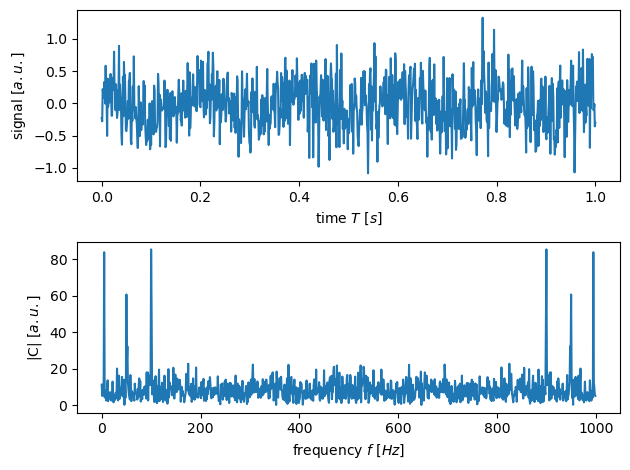

In [14]:
# ↓↓↓ Your code goes here ↓↓↓
fourier50 = fourier[50]
noise = 1/N * (np.real(fourier50) * np.cos(2*np.pi*50*time) + 
               np.imag(fourier50) * np.sin(2*np.pi*50*time))

signal_nonoise = signal + 2 * noise

fig, ax = plt.subplots(2, layout='tight')
ax[0].plot(time, signal_nonoise)
ax[0].set_xlabel('time $T$ [$s$]')
ax[0].set_ylabel('signal [$a.u.$]')

ax[1].plot(abs(DFT(signal_nonoise, N)))
ax[1].set_xlabel('frequency $f$ [$Hz$]')
ax[1].set_ylabel('|C| [$a.u.$]')

### FFT: fast Fourier Transform
An important problem with the straightforward implementation of the DFT is the fact that the algorithm is computationally expensive and thus requires many numerical operations. For a sample of $N$ datapoints, the computation time scales as $O\left(N^2\right)$. As a result, the DFT that you have implemented is rather slow and you need to wait a little to get your answer. This becomes impossible to work with when the sample size increases and is unacceptable when you have to do Fourier-based processing in real time (e.g. MP3 decoding, image recognition, etc.).

The work-around is to break the DFT up in several smaller length DFTs recursively. This is known as the fast Fourier Transform (FFT). The most common FFT algorithm is the Cooley-Turkey algorithm ([https://en.wikipedia.org/wiki/Cooley%E2%80%93Tukey_FFT_algorithm](https://en.wikipedia.org/wiki/Cooley%E2%80%93Tukey_FFT_algorithm)). In general, an FFT is an efficient algorithm to compute the DFT and speeds up the computation from $O\left(N^2\right)$ to $O\left(N\log_2N\right)$, which constitutes a substantial gain for large $N$.

There is usually no need to program your own efficient FFT algorithm, as this has been done for you. In Python, the FFT is part of `numpy`, and you can implement the FFT by using
```python
from numpy import fft
FourierTransform = fft.fft(signal)
```

#### Exercise 3.
1. Calculate the FFT of the signal using the built-in `numpy` routine and compare the result of the FFT with the DFT routine.

Text(0.5, 1.0, 'DFT')

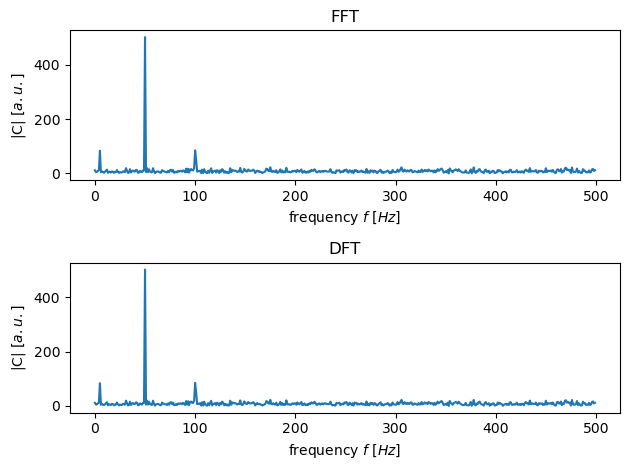

In [17]:
FFT = np.fft.fft(signal)

# ↓↓↓ Your code goes here ↓↓↓
FFT_freq = np.fft.fftfreq(len(signal), 1/N)

fig, ax = plt.subplots(2, layout='tight')

ax[0].plot(FFT_freq[:N//2], np.abs(FFT[:N//2]))
ax[1].plot(f[:N//2], np.abs(fourier[:N//2]))

[axes.set_xlabel('frequency $f$ [$Hz$]') for axes in ax]
[axes.set_ylabel('|C| [$a.u.$]') for axes in ax]

ax[0].set_title('FFT')
ax[1].set_title('DFT')

2. (*) Subtract the 50 Hz noise signal as well as the signals that you identified as a peak in the DFT from the original signal in the time domain. This remaining signal should contain only noise. Determine the FFT of this remaining signal and compare this to the FFT of the original signal by plotting the amplitude as a function of frequency in a semi-logarithmic plot (use `semilogy`). Did you manage to subtract all the signals?

In [47]:
print(FFT_freq[50])
print(FFT_freq[1000-50])

50.0
-50.0


Text(0.5, 1.0, 'FFT without noise')

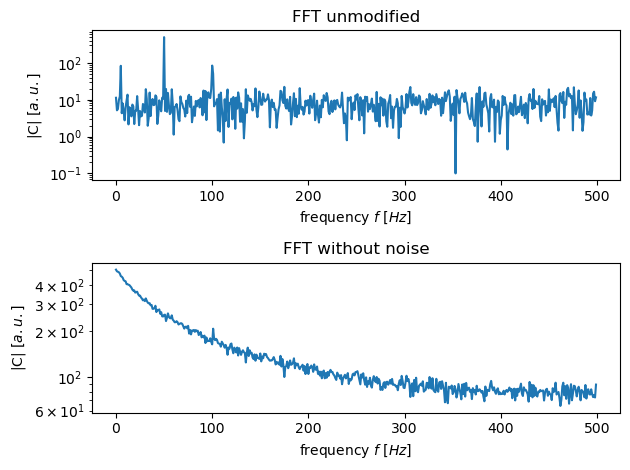

In [55]:
# ↓↓↓ Your code goes here ↓↓↓
fig, ax = plt.subplots(2, layout='tight')

ax[0].semilogy(FFT_freq[:N//2], np.abs(FFT[:N//2]))
ax[0].set_title('FFT unmodified')

[a.set_xlabel('frequency $f$ [$Hz$]') for a in ax]
[a.set_ylabel('|C| [$a.u.$]') for a in ax]

noise = np.exp(-2j*np.pi*50*time) * FFT[50]

signal_nonoise = signal - noise

FFT_no_noise = np.fft.fft(signal_nonoise)
ax[1].semilogy(FFT_freq[:N//2], np.abs(FFT_no_noise[:N//2]))
ax[1].set_title('FFT without noise')

3. (**) Ideally, this should result in some random noise that is independent of frequency (so-called white noise). Explain what goes wrong with the high-frequency signal. What can be done to correct for this error? *Hint: Investigate the Fourier Transform around the three frequencies. Do you believe that each of them is a single peak with a well-defined frequency?*

Text(0.5, 1.0, 'FFT without 50Hz after inverse FFT')

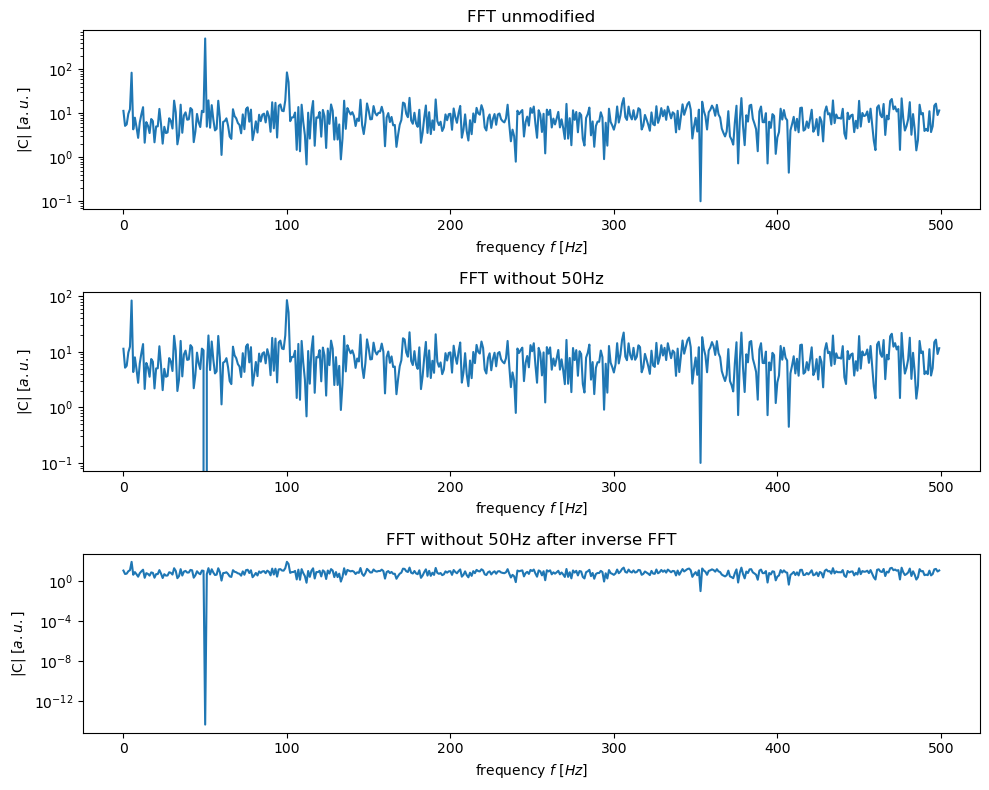

In [71]:
# ↓↓↓ Your code goes here ↓↓↓
fig, ax = plt.subplots(3, layout='tight', figsize=(10, 8))
ax[0].semilogy(FFT_freq[:N//2], np.abs(FFT[:N//2]))
ax[0].set_title('FFT unmodified')

FFT_nofifty = np.copy(FFT)
FFT_nofifty[50] = 0
FFT_nofifty[-50] = 0

ax[1].semilogy(FFT_freq[:N//2], np.abs(FFT_nofifty[:N//2]))
ax[1].set_title('FFT without 50Hz')

[a.set_xlabel('frequency $f$ [$Hz$]') for a in ax]
[a.set_ylabel('|C| [$a.u.$]') for a in ax]

signal_nonoise = np.fft.ifft(FFT_nofifty)
FFT_no_noise = np.fft.fft(signal_nonoise)

ax[2].semilogy(FFT_freq[:N//2], np.abs(FFT_no_noise[:N//2]))
ax[2].set_title('FFT without 50Hz after inverse FFT')

It appears like just setting the signal at 50 to zero modifies the signal in a completely different way, which means there must be more going on with the signal.

4. (**) Create a function that computes the DFT (if you haven't done this already) and verify that the built-in FFT in `numpy` is indeed faster. You can use the following snippets to measure the time in Python:

```python
%timeit functionThatCalculatesDFT(signal)
%timeit np.fft.fft(signal)
```

Alternatively, you can measure the time using

```python
import time

tstart = time.clock()
functionThatCalculatesDFT(signal)
tend = time.clock()
```

In [19]:
%timeit DFT(signal, N)
%timeit np.fft.fft(signal)

76.3 ms ± 1.84 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
16.8 µs ± 84.9 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


Holy shit what a difference